# Сlassification models

### In this paper, I will try to train a classifier to classify bank borrowers into good (those who will repay the loan on time) and bad (those who will not repay the loan or repay it late) based on a set of bank borrower characteristics.

### Dataframe description  
This dataset contains information about 32581 borrowers of the bank:  
**person_age** - age of the borrower  
**person_income** - annual income of the borrower     
**person_home_ownership** - housing: rented, mortgage payment, own housing     
**person_emp_length** - length of service      
**loan_intent** - purpose of the loan: start-up, treatment, etc.  
**loan_grade** - loan quality assessment     
**loan_amnt** - loan amount     
**loan intrate** - interest rate on the loan  
**loan_status - loan status (0 - paid, 1 - not paid) TARGET VARIABLE**     
**loan_percent_income** - loan payment amount as a % of income   
**cb_person_default_on_file** - credit history   
**cb_preson_cred_hist_length** - length of credit history

In [1]:
#import the necessary libraries
%pip install seaborn
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# graphs are embedded in the notepad 
%matplotlib inline

# disable Anaconda warnings
import warnings
warnings.simplefilter('ignore')

### 1. Let's look at the dataset: .head (), .info (), .dtypes, .describe ()  

In [2]:
# Read the file with the initial data into the credit dataframe
credit2 = pd.read_csv('credit_default.csv')
credit2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Let's use .info ()
credit2.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.5+ MB


We see that there are missing values and 4 categorical variables.

In [4]:
# use .describe ()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
credit2.describe ()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000,32581.000,31686.000,32581.000,29465.000,32581.000,32581.000,32581.000
mean,27.735,66074.848,4.790,9589.371,11.012,0.218,0.170,5.804
std,6.348,61983.119,4.143,6322.087,3.240,0.413,0.107,4.055
min,20.000,4000.000,0.000,500.000,5.420,0.000,0.000,2.000
25%,23.000,38500.000,2.000,5000.000,7.900,0.000,0.090,3.000
50%,26.000,55000.000,4.000,8000.000,10.990,0.000,0.150,4.000
75%,30.000,79200.000,7.000,12200.000,13.470,0.000,0.230,8.000
max,144.000,6000000.000,123.000,35000.000,23.220,1.000,0.830,30.000


Among the atypical data, we see people whose age is 144 years and people whose work experience is 123 years. Also anomalous is a person with an income of 6000000 who takes out a loan.

### 2. Clean up the missing values: fillna(), dropna() 

In [5]:
# Delete all missing values:
credit2 = credit2.dropna(axis=0)

### 3. Analyse outliers in the data and remove them if necessary

As we have already learned, we have atypical values in the person_income, person_age, and person_emp_length columns. Let's analyse them in more detail:

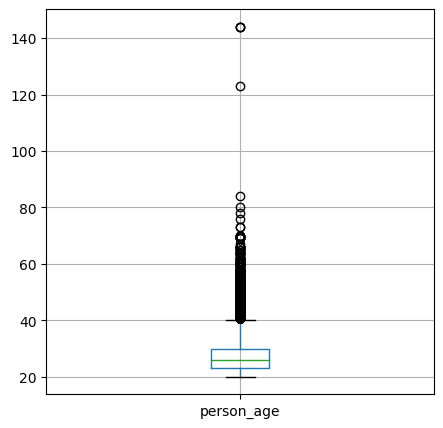

In [6]:
#For the person_age variable, let's build a box plot for better analysis of atypical data:
credit2[['person_age']].boxplot(figsize=(5, 5));

In my opinion, to be considered a false positive, the client's age should be no more than 90 years old. We will remove the false values:

In [7]:
# Removing rows where the person_age value is greater than 90
credit2 = credit2[(credit2['person_age'] <= 90)]

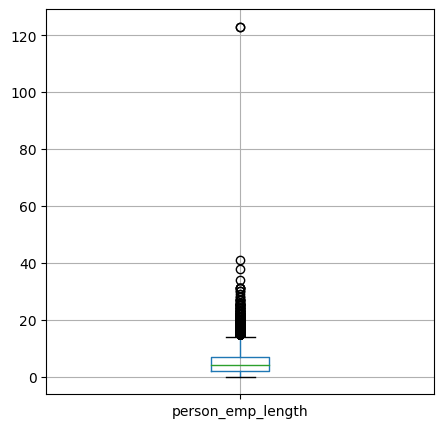

In [8]:
#For the person_emp_length variable, let's build a box plot for better analysis of atypical data:
credit2[['person_emp_length']].boxplot(figsize=(5, 5));

We can see that there is only one atypical value, when the length of service is 123 years. Let's delete it:

In [9]:
#Remove rows where person_emp_length is greater than 80
credit2 = credit2[(credit2['person_emp_length'] <= 80)]

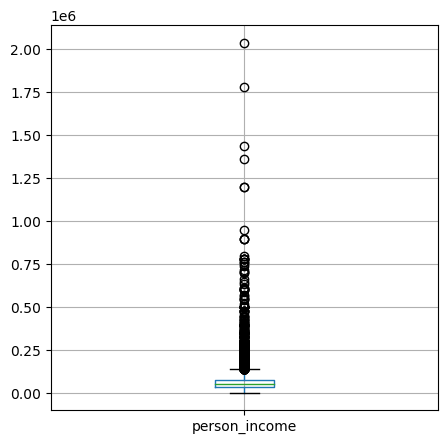

In [10]:
#For the person_income variable, let's build a box plot for better analysis of atypical data:
credit2[['person_income']].boxplot(figsize=(5, 5));

In [11]:
#Remove rows where person_income value is greater than 10000000
credit2 = credit2[(credit2['person_emp_length'] <= 1000000)]

### 4. For a better understanding of the data, let's conduct visual and exploratory data analysis

To better understand the data, let's take the following steps:
1. Find the correlations between the columns and build a heat map of the correlations
2. Make a distribution of several columns
3. Grouping of loans
4. Visualise the most correlated variables
5. Analyse the impact of several factors on loan_status using visualisation 

We are most interested in the loan_status indicator because it is the target variable.

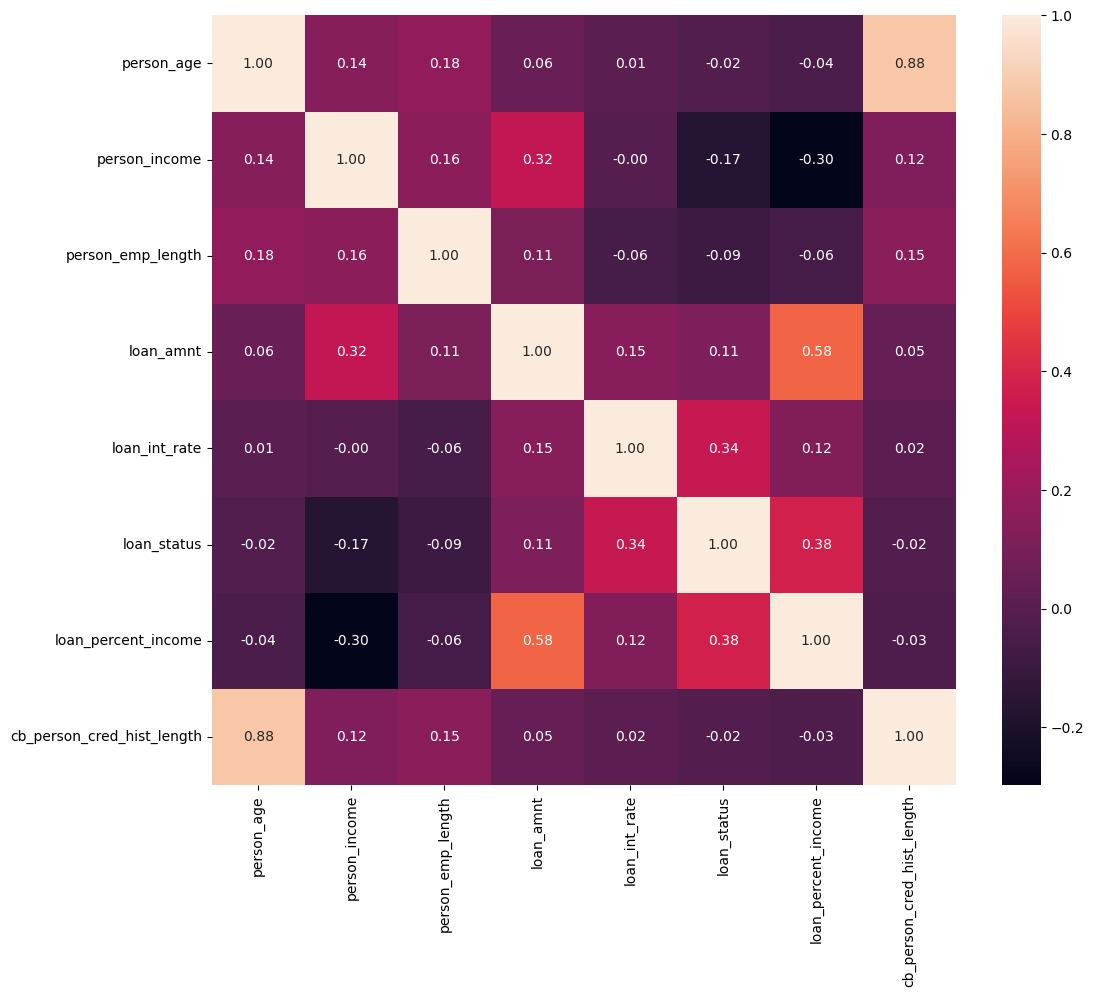

In [12]:
# Build a correlation matrix to see the linear relationships between the indicators.

# Creating a correlation matrix
corr_matrix = credit2.corr()

# Displaying the correlation matrix
plt.figure(figsize=(12, 10 ))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

As we can see, the largest positive linear relationship is between person_age and cb_person_cred_hist_length and is 0.88.
The largest negative linear relationship is between the indicators loan_percent_income and person_income and is -0.3
As for the loan_status indicator, the variable loan_percent_income has the highest correlation with it and is 0.38

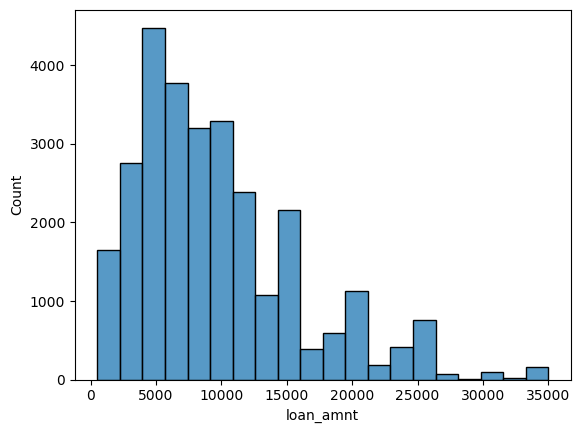

In [13]:
# Let's split several columns:
# Column loan_amnt
sns.histplot(credit2['loan_amnt'], bins=20)
plt.show()

As you can see, most people took out loans of about 5000. However, there are also loans of up to 35,000.

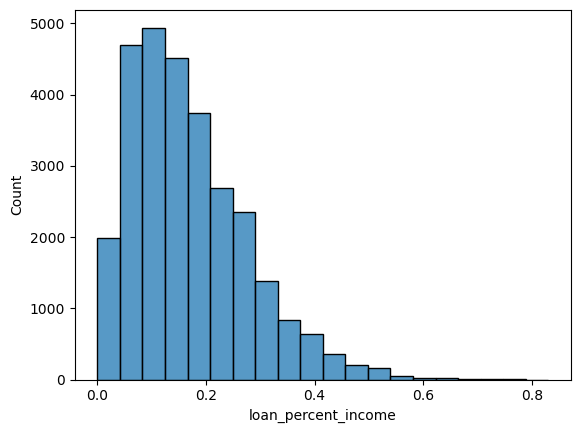

In [14]:
# Column loan_percent_income
sns.histplot(credit2['loan_percent_income'], bins=20)
plt.show()

As for the percentage of salary. We can see that the highest ratio is between 10% and 20% of the salary. 

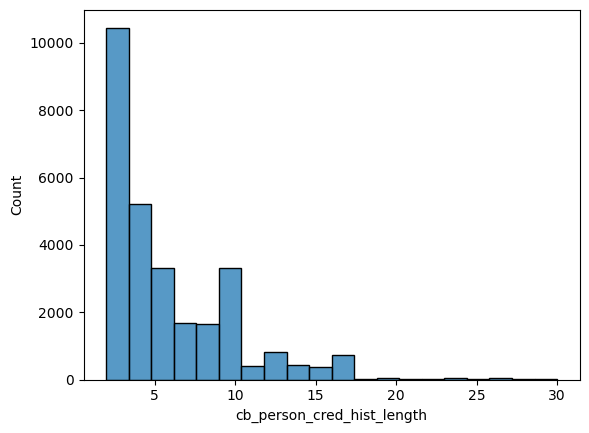

In [15]:
# Column cb_person_cred_hist_length
sns.histplot(credit2['cb_person_cred_hist_length'], bins=20)
plt.show()

Most clients have a credit history of up to 3 years. However, there are also cases when it is 30 years old. We conclude that the bank has been operating for at least 30 years

In [16]:
# Let's group loans by quality:
credit2.groupby('loan_grade')[['loan_int_rate', 'loan_amnt', 'person_emp_length', 'person_income', 'person_age']].mean()

,loan_int_rate,loan_amnt,person_emp_length,person_income,person_age
loan_grade,,,,,
A,7.347,8577.412,5.112,67015.407,27.675
B,11.002,10055.946,4.739,66780.499,27.638
C,13.453,9302.141,4.427,64773.938,27.731
D,15.349,10871.874,4.671,64244.273,27.933
E,17.006,12929.109,4.393,71174.186,27.745
F,18.597,15308.014,4.311,80079.230,28.392
G,20.252,18141.949,5.847,78994.898,28.322


You can see that the loans are grouped by interest rate. The loan amount also differs significantly. The highest salaries are for clients who took out loans from group F.

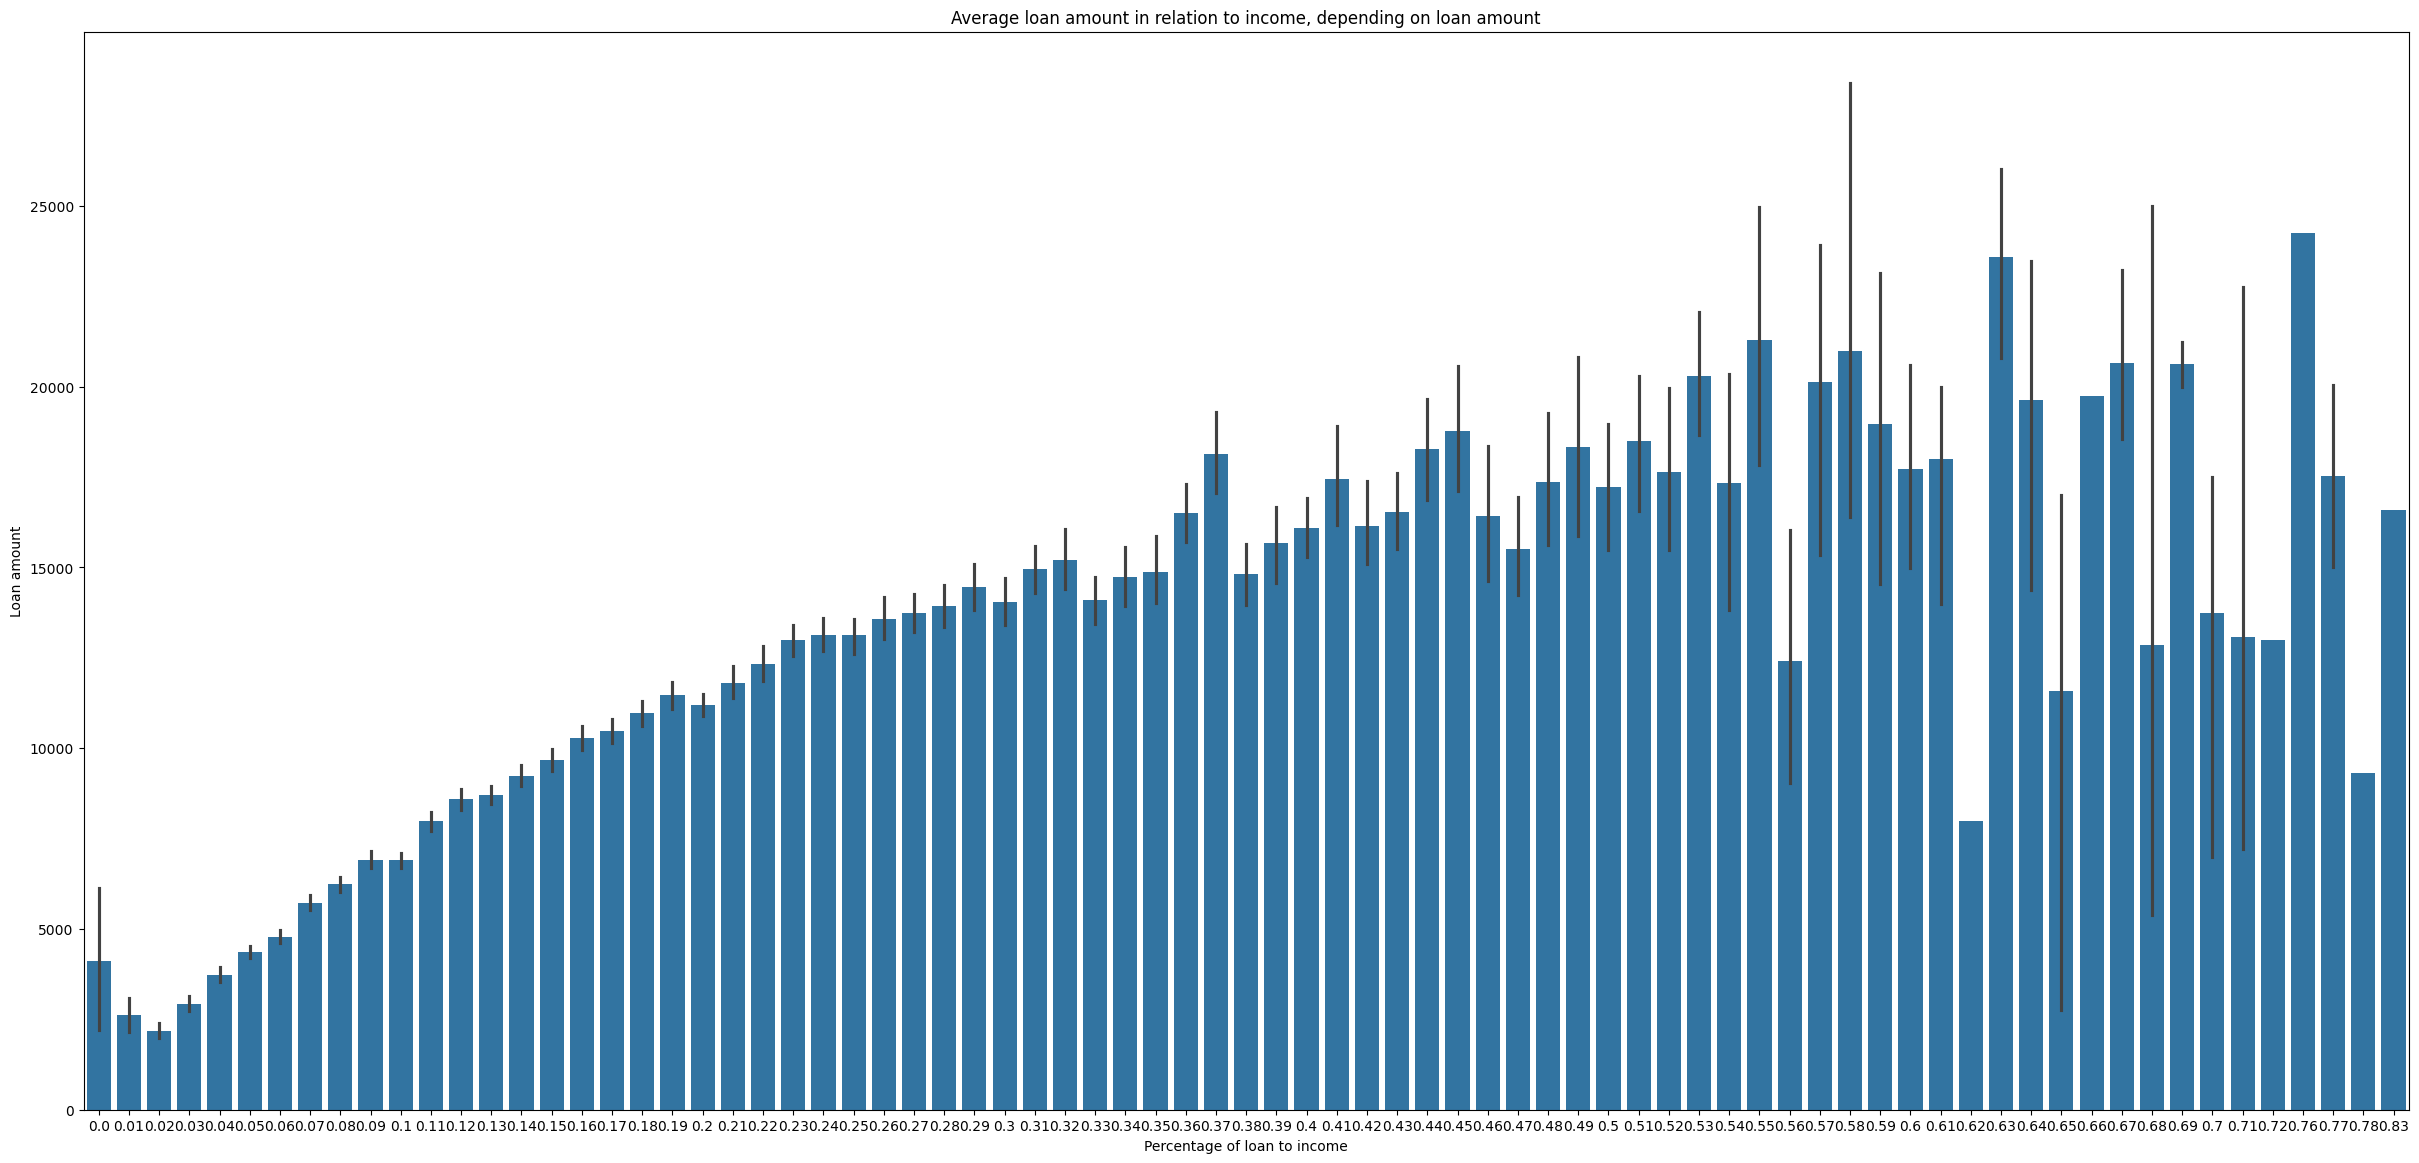

In [17]:
# Visualise the most correlated variables
# Analyse the relationship between loan_percent_income and loan_amnt
plt.figure(figsize=(30, 14))
sns.barplot(x='loan_percent_income', y='loan_amnt', data=credit2, )
plt.title('Average loan amount in relation to income, depending on loan amount')
plt.xlabel('Percentage of loan to income')
plt.ylabel('Loan amount')
plt.show()

Analysing the dependence, we see that it persists up to a ratio of 50% of income. After that, the data varies greatly and on average, the dependence does not hold. Conclusion: the larger the loan, the greater the share of your income you will have to pay to repay it. 

Text(0.5, 1.0, 'Relationship between age and length of credit bureau history')

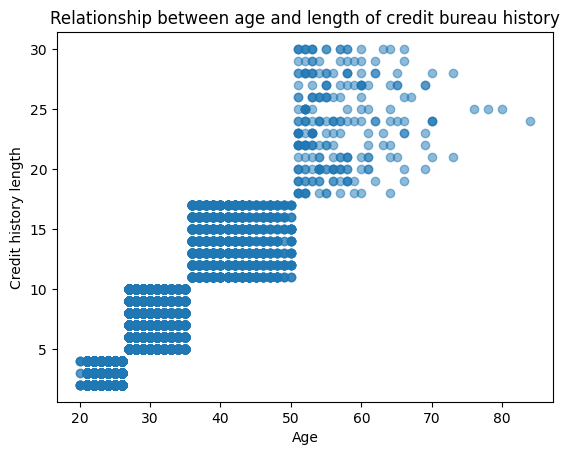

In [40]:
# Let's visualise the relationship between person age and credit history length:
plt.scatter(credit2['person_age'], credit2['cb_person_cred_hist_length'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Credit history length')
plt.title("Relationship between age and length of credit bureau history")

As you can see, the scatter plot makes it clear that there is a clear relationship between these two indicators. Drawing a conclusion from this visualisation, we can state that people do not tend to change banks during their lifetime, as evidenced by the length of credit history of the elderly.

Text(0.5, 1.0, 'Relationship between loan interest rate, loan purpose and credit history')

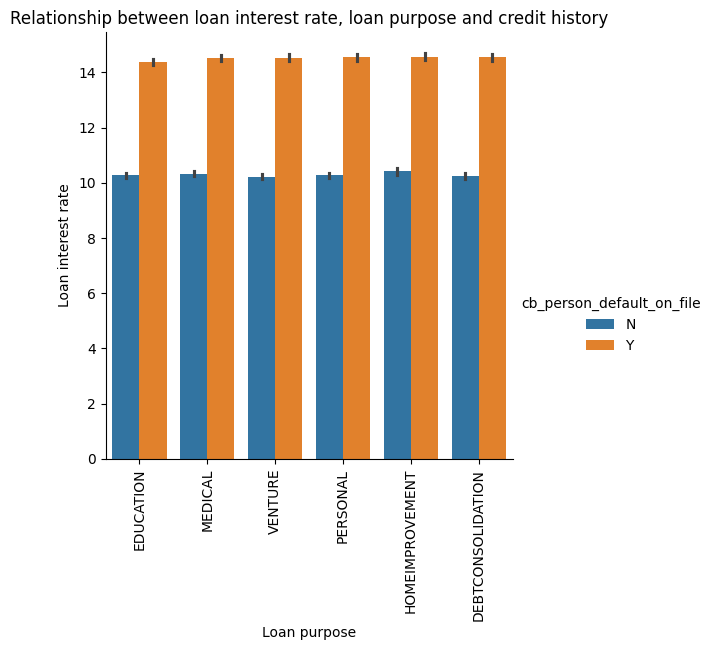

In [19]:
#Let's analyse the relationship between loan intent, interest rate and credit history.
sns.catplot(data=credit2, x='loan_intent', y='loan_int_rate', hue='cb_person_default_on_file', kind='bar')
plt.xticks(rotation=90);
plt.xlabel('Loan purpose')
plt.ylabel('Loan interest rate')
plt.title("Relationship between loan interest rate, loan purpose and credit history")

We can see that the purpose of the payment does not affect the interest rate, but in all cases, having a credit history increases the interest rate by 4%.

Text(0.5, 1.0, 'Relationship between loan interest rate and loan status')

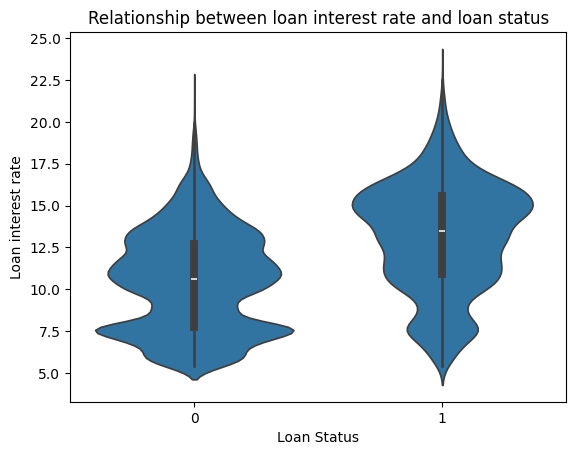

In [20]:
# Analyse the influence of several factors on loan_status using visualisation 
# Visualise the relationship between Loan Status and Loan Interest Rate
sns.violinplot(x='loan_status', y='loan_int_rate', data=credit2)
plt.xlabel('Loan Status')
plt.ylabel('Loan interest rate')
plt.title('Relationship between loan interest rate and loan status')

As we can see, the interest rate on loans in cases of default is much higher. On average, it is about 14%, and most often about 15%. In cases where the loan is repaid, it is most often 7.5%, and on average 10.5%. Consequently, if a person takes out a loan with a higher interest rate, the chance of having problems repaying it will increase.

Text(0.5, 1.0, 'Relationship between percentage of income payment and loan status')

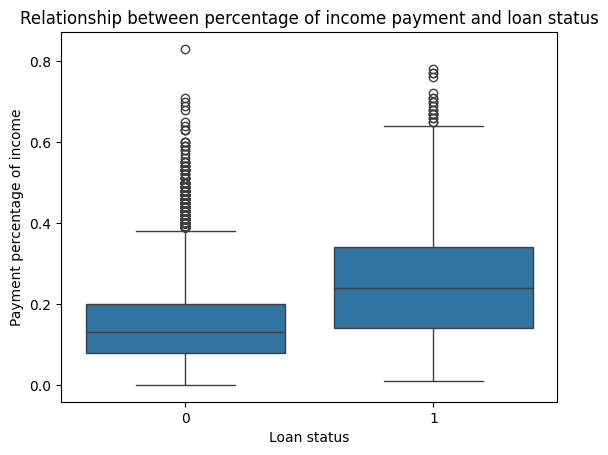

In [21]:
# Visualise the relationship between Loan Status and loan_percent_income
credit2.describe ()
sns.boxplot(x='loan_status', y='loan_percent_income', data=credit2)
plt.xlabel('Loan status')
plt.ylabel('Payment percentage of income')
plt.title('Relationship between percentage of income payment and loan status')

The visualisation clearly shows that, on average, if a loan was repaid, clients had to spend about 15% of their income on repayment. If the loan was not repaid, this percentage was about 25 per cent. Conclusion: the higher the percentage of income a client needs to pay for a loan, the greater the chance that they will have problems repaying it.

### 5. Implement logistic regression, KNN and SVM algorithms for classifying bank borrowers. We will check the quality of the classifiers.

In [22]:
# For the next steps, we need to convert the categorical variables to numeric variables:
# Since the number of categories in the variables is quite large, we set drop_first=False for convenience. 
credit2 = pd.get_dummies(credit2, columns = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"], drop_first=True)

In [23]:
#Define the matrix of independent variables (factors) and the vector of the dependent (target) variable
X = credit2.drop(credit2[['loan_status']], axis=1)
y = credit2['loan_status']

In [24]:
# Standardise the matrix X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.fit_transform(X)

In [25]:
# Split the data into training and test samples
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, stratify = y, test_size=0.3, random_state=111)

#### 1. Logistic regression  

In [26]:
# Create and train a classifier on the training dataset
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 

# train the model on the training set - X_train, y_train
lr.fit(X_train, y_train)

# make a forecast of the target variable on the test sample - X_test
y_pred_lr = lr.predict(X_test)

In [27]:
# Evaluate the quality of the classifier
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred_lr, digits=3))

              precision    recall  f1-score   support

           0      0.888     0.953     0.920      6729
           1      0.770     0.566     0.653      1861

    accuracy                          0.869      8590
   macro avg      0.829     0.760     0.786      8590
weighted avg      0.863     0.869     0.862      8590



There were 6729 observations in the first category and 1861 in the second.
Accuracy = 0.869 - the logistic regression correctly classified 86.9% of all observations. We can conclude that in most cases, the model reflects reality.

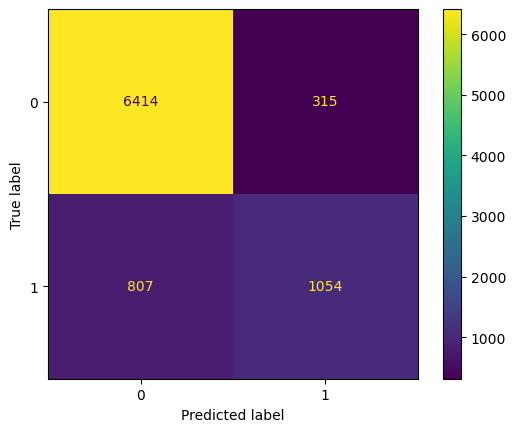

In [28]:
 # Build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# the error matrix
cm = confusion_matrix(y_test, y_pred_lr)

# visualisation of the error matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1']) 
# display_label - sets the names of classes (0 - 1st class, 1 - 2nd class)
cmd.plot()

1. Repaid loans (y = 0): 6414 cases were correctly classified, 315 firms were incorrectly classified
2. Unpaid loans (y = 1): 1054 cases were correctly classified, 807 firms were incorrectly classified

We can see that a rather large percentage of unpaid loans were classified incorrectly (47%). As for the paid loans, there were only 4.7% of incorrect classifications. On average, the model was correct in 86.9% of cases. We can conclude that although the model generally correctly reflects most of the observations, the second class of the model predicts much worse than the first. 

#### 2.  k-nearest neighbor method(KNN)  

In [45]:
# Create and train a classifier on the training dataset

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

# make a prediction on the test sample - X_test
y_pred_KNN = KNN.predict(X_test)

In [30]:
#Оцінимо якість класифікатора
print(classification_report(y_test, y_pred_KNN, digits=3))

<class 'NameError'>: name 'y_pred_KNN' is not defined

Accuracy = 0.895 - the nearest neighbours method correctly classified 89.5% of all observations. We conclude that, in general, the nearest neighbours method models the loan_status value better than logistic regression by 3.6%.

In [31]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# the error matrix
cm = confusion_matrix(y_test, y_pred_KNN)

# visualisation of the error matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1']) 
# display_label - sets the names of the classes
cmd.plot()

<class 'NameError'>: name 'y_pred_KNN' is not defined

1. Repaid loans (y = 0): 6542 cases were correctly classified, 187 firms were incorrectly classified
2. Unpaid loans (y = 1): 1147 cases were correctly classified, 714 firms were incorrectly classified

We can see that the number of misclassified observations decreased in both categories. In the first, from 4.5% to 2.8%. In the second, from 43.1% to 38.4%. We conclude that the nearest neighbours method is better than logistic regression in all respects.

#### 3.Support vector machine (SVM)

In [32]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(classification_report(y_test, y_pred_svm, digits=3))

              precision    recall  f1-score   support

           0      0.907     0.988     0.946      6729
           1      0.938     0.635     0.757      1861

    accuracy                          0.912      8590
   macro avg      0.923     0.812     0.852      8590
weighted avg      0.914     0.912     0.905      8590



Accuracy = 0.913 - the support vector method correctly classified 91.2% of all observations.
We conclude that, in general, the support vector method models the loan_status value better than the nearest neighbours method by 1.6%.

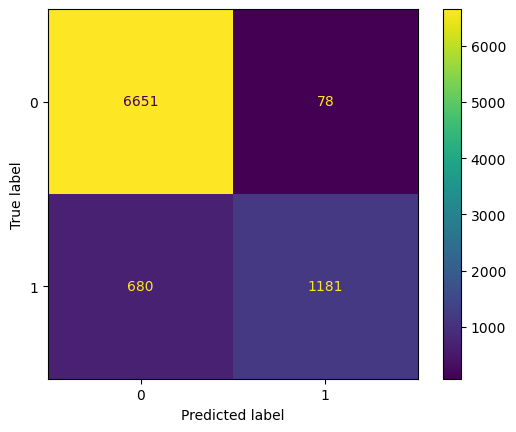

In [33]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# the error matrix
cm = confusion_matrix(y_test, y_pred_svm)

# visualisation of the error matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1']) 
# display_label - sets the names of the classes
cmd.plot()

1. Repaid loans (y = 0): 6651 cases were correctly classified, 78 firms were incorrectly classified
2. Unpaid loans (y = 1): 1181 cases were correctly classified, 680 firms were incorrectly classified

We can see that the number of misclassified observations decreased even further in both categories. In the first, from 2.7% to 1.2%. In the second, from 38.2% to 36.5%. We conclude that the support vector method is better than logistic regression and the nearest neighbours method by all indicators.

### 6. Let's make a decision on granting a loan for new borrowers whose information is in the file 'give_refuse_a_loan.csv': predict the value of the target variable using the algorithm with the highest classification accuracy

In [34]:
# For forecasting, we will use the support vector method, with the highest forecasting accuracy of 91.3%.
# Read the file 'give_refuse_a_loan.csv'
new = pd.read_csv('give_refuse_a_loan.csv')
# let's view it:
new.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  10 non-null     int64  
 1   person_income               10 non-null     int64  
 2   person_home_ownership       10 non-null     object 
 3   person_emp_length           9 non-null      float64
 4   loan_intent                 10 non-null     object 
 5   loan_grade                  10 non-null     object 
 6   loan_amnt                   10 non-null     int64  
 7   loan_int_rate               10 non-null     float64
 8   loan_percent_income         10 non-null     float64
 9   cb_person_default_on_file   10 non-null     object 
 10  cb_person_cred_hist_length  10 non-null     int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 792.0+ bytes


We see that there is one missing value. Therefore, we cannot predict one of the outcomes.

In [35]:
# Convert categorical variables to numeric variables:
new = pd.get_dummies(new, columns = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"], drop_first=True)

# Add the missing columns
new = new.assign(person_home_ownership_OTHER = 0, loan_intent_DEBTCONSOLIDATION = 0, loan_grade_D = 0, loan_grade_E = 0, loan_grade_F = 0, loan_grade_G = 0)

# Remove all missing values:
new = new.dropna(axis=0)

In [36]:
# standardise the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(new)
X_new = sc.fit_transform(new)

In [37]:
# Prediction
y_pred_svm_new = svm.predict(X_new)

In [38]:
# add the predicted values of the target variable to the dataframe
new['Predicted'] = y_pred_svm_new
new

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_HOMEIMPROVEMENT,...,loan_grade_B,loan_grade_C,cb_person_default_on_file_Y,person_home_ownership_OTHER,loan_intent_DEBTCONSOLIDATION,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,Predicted
0,23,85000,8.000,5000,14.350,0.060,3,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,23,42000,7.000,15000,11.830,0.360,4,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,27,78000,2.000,15000,8.940,0.190,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,51000,7.000,10000,6.030,0.200,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,22,75000,6.000,12000,13.490,0.160,2,0,1,0,...,0,1,0,0,0,0,0,0,0,0
6,29,32400,5.000,10275,6.620,0.320,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,25,14400,0.000,1500,12.990,0.100,2,0,1,0,...,0,1,1,0,0,0,0,0,0,0
8,26,58000,0.000,20000,10.250,0.340,4,0,1,1,...,1,0,0,0,0,0,0,0,0,1
9,26,85200,10.000,8000,6.030,0.090,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y_pred_svm_new

array([0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

As we can see, in all but one case, the loan will be repaid. Therefore, we conclude that the decision to grant a loan to new borrowers is positive, with the exception of the client with index 8 (a 26-year-old man who requests a loan of 58,000).